In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Keras Imports
from keras import datasets
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Conv2D, MaxPooling2D

from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.


# Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [4]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

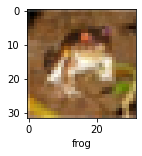

In [5]:
plot_sample(X_train, y_train, 0)

# Normalize training data before training the neural net

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [6]:
X_train = X_train/255
X_test = X_test/255

# Now build the Sequential Model and add layers into it

In [22]:
def baseline_model():

    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),)
    model.add(MaxPooling2D((2, 2)),)

    model.add(Flatten())
    model.add(Dense(64, activation="relu"))
#     model.add(Dense(32, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model

In [32]:
ml = baseline_model()
ml.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_10 (Dense)             (None, 32)               

In [23]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=5, verbose=1)

In [24]:
estimator.fit(X_train, y_train, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 61s 1ms/step - loss: 1.4363 - accuracy: 0.4785
Epoch 2/10
50000/50000 [==============================] - 66s 1ms/step - loss: 1.0843 - accuracy: 0.6194
Epoch 3/10
50000/50000 [==============================] - 69s 1ms/step - loss: 0.9641 - accuracy: 0.6616
Epoch 4/10
50000/50000 [==============================] - 66s 1ms/step - loss: 0.8842 - accuracy: 0.6923
Epoch 5/10
50000/50000 [==============================] - 64s 1ms/step - loss: 0.8244 - accuracy: 0.7131
Epoch 6/10
50000/50000 [==============================] - 68s 1ms/step - loss: 0.7738 - accuracy: 0.7312
Epoch 7/10
50000/50000 [==============================] - 70s 1ms/step - loss: 0.7334 - accuracy: 0.7447
Epoch 8/10
50000/50000 [==============================] - 67s 1ms/step - loss: 0.6952 - accuracy: 0.7593
Epoch 9/10
50000/50000 [==============================] - 67s 1ms/step - loss: 0.6625 - accuracy: 0.7701
Epoch 10/10
50000/50000 [==============================

# Evaluation of Model

In [27]:
acc = estimator.score(X_test, y_test)
print('The accuracy is' , round(acc, 3))

The accuracy is 0.667


10000/10000 [==============================] - 4s 381us/step


Text(69.0, 0.5, 'Truth')

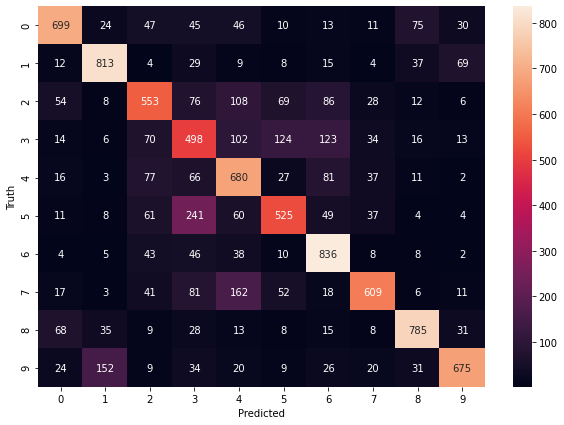

In [29]:
import tensorflow as tf

y_predicted_labels = estimator.predict(X_test)
# y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
from sklearn.metrics import confusion_matrix , classification_report

print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.70      0.73      1000
           1       0.77      0.81      0.79      1000
           2       0.61      0.55      0.58      1000
           3       0.44      0.50      0.46      1000
           4       0.55      0.68      0.61      1000
           5       0.62      0.53      0.57      1000
           6       0.66      0.84      0.74      1000
           7       0.77      0.61      0.68      1000
           8       0.80      0.79      0.79      1000
           9       0.80      0.68      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

